# $T_2$ Ramsey Experiment

This experiment serves as one of the series of experiments used to characterize a single qubit. Its purpose is to determine two of the qubit's properties: *detuning frequency* and *$T_2*$*. The rough frequency of the qubit was already determined previously. Here, we would like to measure the *detuning*, that is  the difference between the qubit's precise frequency and the frequency of the rotation pulses (based on the rough frequency). This part of the experiment is also called a *Ramsey Experiment*. $T_2*$ represents the rate of decay toward a mixed state, when the qubits is initiated to the |+⟩ state.

In [1]:
import qiskit
from qiskit_experiments.characterization import T2StarExperiment

The circuit used for the experiment comprises the following:

    1. Hadamard gate
    2. delay
    3. p gate that rotates the qubit in the x-y plane 
    4. Hadamard gate
    5. measurement

During the delay time, we expect the qubit to precess about the z-axis. If the p gate and the precession offset each other perfectly, then the qubit will arrive at the |1⟩ state (after the second Hadamard gate). By varying the extension of the delays, we get a series of oscillations of the qubit state between the |0⟩ and |1⟩ states. We can draw the graph of the resulting function,and can analytically extract the desired values.

In [2]:
# set the computation units to seconds
unit = 's' #seconds
qubit = 0
# set the desired delays
delays = list(range(1,50))


In [3]:
# Create a T2* experiment. Print the first circuit as an example
exp1 = T2StarExperiment(qubit, delays, unit=unit)
print(exp1.circuits()[0])

     ┌───┐┌─────────────┐┌──────┐ ░ ┌───┐ ░ ┌─┐
q_0: ┤ H ├┤ DELAY(1[s]) ├┤ P(0) ├─░─┤ H ├─░─┤M├
     └───┘└─────────────┘└──────┘ ░ └───┘ ░ └╥┘
c: 1/════════════════════════════════════════╩═
                                             0 


We run the experiment on a simple, simulated backend, created specifically for this experiment.

In [4]:
from backends.t2star_backend import T2starBackend
import qiskit_experiments.matplotlib
from qiskit_experiments.matplotlib import pyplot, requires_matplotlib
from qiskit_experiments.matplotlib import HAS_MATPLOTLIB

# The behavior of the backend is determined by the following parameters
backend = T2starBackend(
                    p0={"a_guess":[0.5], "t2star":[10.0], "f_guess":[0.1], "phi_guess":[0.0],
                        "b_guess": [0.5]},
                    initial_prob_plus=[0.0],
                    readout0to1=[0.02],
                    readout1to0=[0.02],
                    dt_factor=1,
                )


The resulting graph will have the form:
$ f(t) = a^{-x/T_2*} \cdot cos(2 \pi f t + \phi) + b $
where *t* is the delay, $T_2*$ is the decay factor, and *f* is the detuning frequency.
`dt_factor` is a scaling factor that depends on the STI units used. It is `1` here, because the unit is seconds.

---------------------------------------------------
Experiment: T2StarExperiment
Experiment ID: e6708121-627a-4879-bf16-885121d9cb67
Status: DONE
Circuits: 49
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- t2star_value: 9.862337321094822
- frequency_value: 0.10008210936380105
- stderr: 0.41335054955349715
- unit: s
- label: T2*
- fit: {'popt': array([ 0.48273947,  9.86233732,  0.10008211, -0.02233073,  0.4991085 ]), 'popt_keys': None, 'popt_err': array([0.01438998, 0.41335055, 0.00070806, 0.03169723, 0.00224368]), 'pcov': array([[ 2.07071427e-04, -4.45635964e-03, -3.24631432e-06,
         2.02914362e-04,  1.72598053e-06],
       [-4.45635964e-03,  1.70858677e-01,  6.35309914e-05,
        -4.03136292e-03, -5.82055377e-06],
       [-3.24631432e-06,  6.35309914e-05,  5.01354640e-07,
        -1.69845112e-05, -2.80593483e-07],
       [ 2.02914362e-04, -4.03136292e-03, -1.69845112e-05,
         1.00471424e-03,  1.73482834e-05],
       [ 1.72598

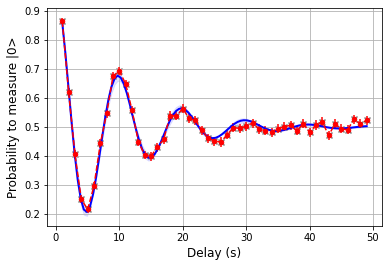

In [5]:
exp1.set_analysis_options(user_p0=None, plot=True, shots=2000)
expdata1 = exp1.run(backend=backend)
print(expdata1)

---------------------------------------------------
Experiment: T2StarExperiment
Experiment ID: ff6783c4-b4d2-4ddb-9a98-a8963f4117e5
Status: DONE
Circuits: 49
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- t2star_value: 9.504130669567148
- frequency_value: 0.10107255019596002
- stderr: 0.4054709687134613
- unit: s
- label: T2*
- fit: {'popt': array([ 0.48610841,  9.50413067,  0.10107255, -0.03425973,  0.49836775]), 'popt_keys': None, 'popt_err': array([0.01481473, 0.40547097, 0.00074748, 0.03227278, 0.00224694]), 'pcov': array([[ 2.19476171e-04, -4.53033727e-03, -3.48890138e-06,
         2.09179577e-04,  2.02868396e-06],
       [-4.53033727e-03,  1.64406706e-01,  6.49658488e-05,
        -3.97996744e-03, -7.56349591e-06],
       [-3.48890138e-06,  6.49658488e-05,  5.58730959e-07,
        -1.83401744e-05, -3.00593912e-07],
       [ 2.09179577e-04, -3.97996744e-03, -1.83401744e-05,
         1.04153227e-03,  1.79209449e-05],
       [ 2.028683

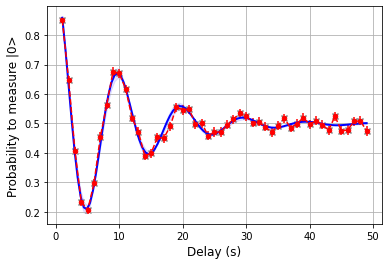

In [6]:
# The user can provide initial estimates for the parameters to help the analysis process
user_p0={
    "A": 0.5,
    "t2star": 11.0,
    "f": 0.15,
    "phi": 0,
    "B": 0.5
        }
exp_with_p0 = T2StarExperiment(qubit, delays, unit=unit)
exp_with_p0.set_analysis_options(user_p0=user_p0, plot=True, shots=2000)
expdata_with_p0 = exp_with_p0.run(backend=backend)
print(expdata_with_p0)

The units can be changed, but the output in the result is always given in seconds. The units in the backend must be adjusted accordingly.

In [7]:
from qiskit.utils import apply_prefix
unit = 'ns'
dt_factor = apply_prefix(1, unit)
print(dt_factor)

1e-09


---------------------------------------------------
Experiment: T2StarExperiment
Experiment ID: 1e05cf04-b2fd-49a0-9def-71ab53a39234
Status: DONE
Circuits: 49
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- t2star_value: 1.1862750156106352e-08
- frequency_value: 79701996.08367729
- stderr: 5.033513465557626e-10
- unit: s
- label: T2*
- fit: {'popt': array([4.86858989e-01, 1.18627502e-08, 7.97019961e+07, 2.61717445e-03,
       4.98900960e-01]), 'popt_keys': None, 'popt_err': array([9.86681793e-03, 5.03351347e-10, 7.66571306e-10, 1.85483861e-02,
       2.20248002e-03]), 'pcov': array([[ 9.73540961e-05, -2.88700709e-12,  2.82402503e-12,
         5.59201194e-05, -2.38406552e-07],
       [-2.88700709e-12,  2.53362578e-19, -7.76137722e-20,
        -1.50690783e-12,  5.21289138e-14],
       [ 2.82402503e-12, -7.76137722e-20,  5.87631567e-19,
         1.41816532e-11,  3.34664431e-13],
       [ 5.59201194e-05, -1.50690783e-12,  1.41816532e-11,
     

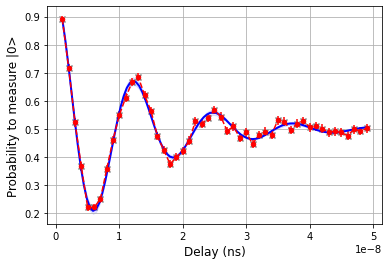

In [8]:
backend_in_ns = T2starBackend(
                    p0={"a_guess":[0.5], "t2star":[12.0], "f_guess":[0.08], "phi_guess":[0.0],
                        "b_guess": [0.5]},
                    initial_prob_plus=[0.0],
                    readout0to1=[0.02],
                    readout1to0=[0.02],
                    dt_factor=dt_factor
                )
exp_in_ns = T2StarExperiment(qubit, delays, unit=unit)
exp_in_ns.set_analysis_options(user_p0=None, plot=True, shots=2000)
expdata_in_ns = exp_in_ns.run(backend=backend_in_ns)
print(expdata_in_ns)

It is possible to add data to an experiment, after the analysis of the first set of data. In the next example we add exp2 to `exp_in_ns` that we showed above.

{'t2star_value': 1.1862750156106352e-08, 'frequency_value': 79701996.08367729, 'stderr': 5.033513465557626e-10, 'unit': 's', 'label': 'T2*', 'fit': {'popt': array([4.86858989e-01, 1.18627502e-08, 7.97019961e+07, 2.61717445e-03,
       4.98900960e-01]), 'popt_keys': None, 'popt_err': array([9.86681793e-03, 5.03351347e-10, 7.66571306e-10, 1.85483861e-02,
       2.20248002e-03]), 'pcov': array([[ 9.73540961e-05, -2.88700709e-12,  2.82402503e-12,
         5.59201194e-05, -2.38406552e-07],
       [-2.88700709e-12,  2.53362578e-19, -7.76137722e-20,
        -1.50690783e-12,  5.21289138e-14],
       [ 2.82402503e-12, -7.76137722e-20,  5.87631567e-19,
         1.41816532e-11,  3.34664431e-13],
       [ 5.59201194e-05, -1.50690783e-12,  1.41816532e-11,
         3.44042626e-04,  8.24472179e-06],
       [-2.38406552e-07,  5.21289138e-14,  3.34664431e-13,
         8.24472179e-06,  4.85091826e-06]]), 'reduced_chisq': 0.9794939632559838, 'dof': 44, 'xrange': [1e-09, 4.9e-08], 'circuit_unit': 'ns'}, '

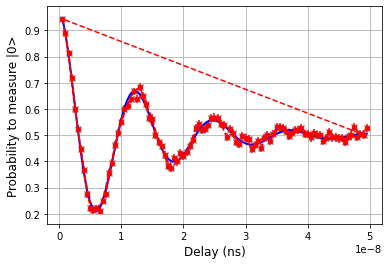

In [9]:
import numpy as np

more_delays = np.linspace(0.5, 49.5, num=50)
                
exp2 = T2StarExperiment(qubit, more_delays, unit=unit)
exp2.set_analysis_options(user_p0=None, shots=2000)
expdata2 = exp2.run(
            backend=backend_in_ns,
            experiment_data=expdata_in_ns,
        )
result2 = expdata2.analysis_result(0)
print(result2)